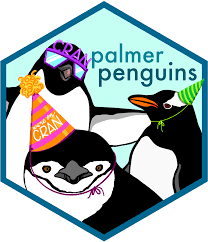

# 1.Description

Here the exploration is done on dataset from seaborn where we will explore Three species of Penguins ,their characterstics on Palmer Archipelago which is on Anver Island- west ofAntartica

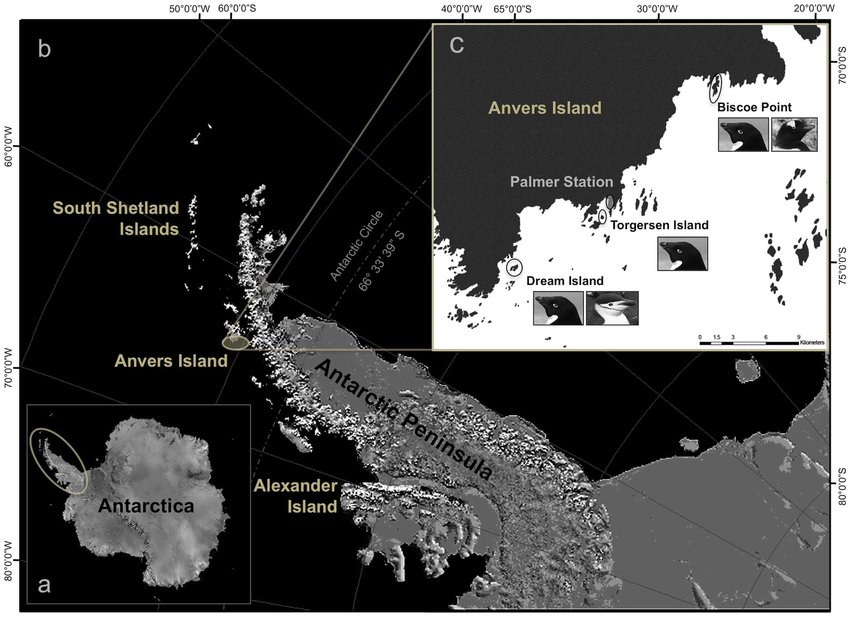

# 2. Importing Datasets and Basic Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [105]:
penguins=sns.load_dataset('penguins')


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Thank you to Dr. Gorman, Palmer Station LTER and the LTER Network! Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use.

In [106]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [96]:
penguins.shape

(344, 7)

In [97]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# 3.Data Cleaning

Checkng Duplicates

In [107]:
penguins.duplicated().sum()

0

checking Null values

In [108]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [109]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [110]:
#Replacing Null values
feature=list(penguins.columns)
feature,type(feature)

(['species',
  'island',
  'bill_length_mm',
  'bill_depth_mm',
  'flipper_length_mm',
  'body_mass_g',
  'sex'],
 list)

In [111]:
for i in feature:
    if penguins[i].dtypes=='float64':
        penguins[i]=penguins[i].fillna(penguins[i].mean())
    else:
        penguins[i]=penguins[i].fillna(penguins[i].mode()[0])

In [115]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [114]:
penguins['sex'].value_counts()

Male      179
Female    165
Name: sex, dtype: int64

Data is Cleaned Now we can perform Analysis

# 4.Analysis

In [119]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,Female
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,Male
170,Chinstrap,Dream,46.4,18.6,190.0,3450.0,Female


In [154]:
np.round(penguins.groupby(['island','species']).mean())

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie               39.0           18.0              189.0   
          Gentoo               47.0           15.0              217.0   
Dream     Adelie               39.0           18.0              190.0   
          Chinstrap            49.0           18.0              196.0   
Torgersen Adelie               39.0           18.0              191.0   

                     body_mass_g  
island    species                 
Biscoe    Adelie          3710.0  
          Gentoo          5069.0  
Dream     Adelie          3688.0  
          Chinstrap       3733.0  
Torgersen Adelie          3716.0

In [159]:
np.round(penguins.corr(),3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,-0.235,0.656,0.595
bill_depth_mm,-0.235,1.000,-0.584,-0.472
flipper_length_mm,0.656,-0.584,1.000,0.871
body_mass_g,0.595,-0.472,0.871,1.000


In [164]:
penguins.groupby(['island','species']).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                124            124                124   
Dream     Adelie                 56             56                 56   
          Chinstrap              68             68                 68   
Torgersen Adelie                 52             52                 52   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             124  124  
Dream     Adelie              56   56  
          Chinstrap           68   68  
Torgersen Adelie              52   52

In [165]:
np.round(penguins.groupby(['island','species','sex']).mean())

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species   sex                                                        
Biscoe    Adelie    Female            37.0           18.0              187.0   
                    Male              41.0           19.0              190.0   
          Gentoo    Female            46.0           14.0              213.0   
                    Male              49.0           16.0              221.0   
Dream     Adelie    Female            37.0           18.0              188.0   
                    Male              40.0           19.0              191.0   
          Chinstrap Female            47.0           18.0              192.0   
                    Male              51.0           19.0              200.0   
Torgersen Adelie    Female            38.0           18.0              188.0   
                    Male              40.0           19.0              194.0   

                            body_mass_g  
island    species   sex                  
Biscoe    Adelie    Female       3369.0  
                    Male         4050.0  
          Gentoo    Female       4680.0  
                    Male         5411.0  
Dream     Adelie    Female       3344.0  
                    Male         4009.0  
          Chinstrap Female       3527.0  
                    Male         3939.0  
Torgersen Adelie    Female       3396.0  
                    Male         3990.0

# 5.Visualization

Before visuals ,Lets have understanding about bill_length,bill_depth and flipper_length

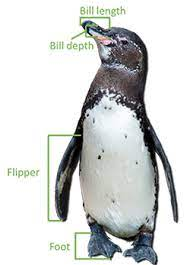

The Three species of our project

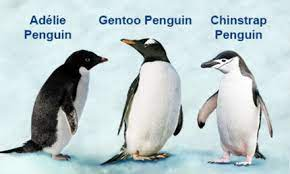

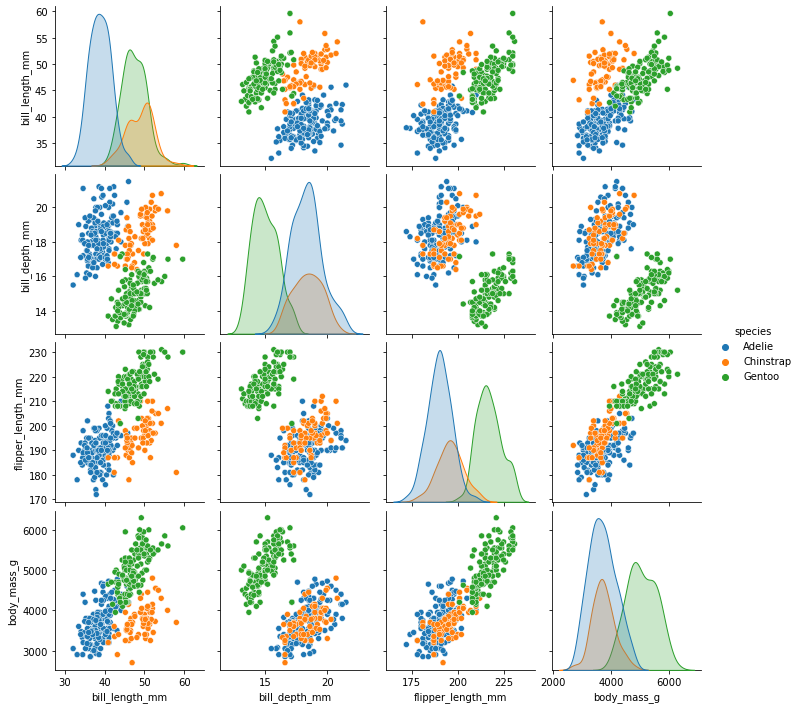

In [129]:

sns.pairplot(data=penguins,kind='scatter',hue='species')

<AxesSubplot:>

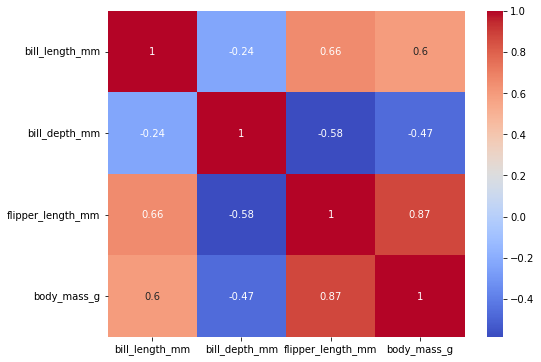

In [136]:
plt.figure(figsize=(8,6))
sns.heatmap(penguins.corr(),annot=True,cmap='coolwarm')

In [143]:
import warnings 
warnings.filterwarnings('ignore')

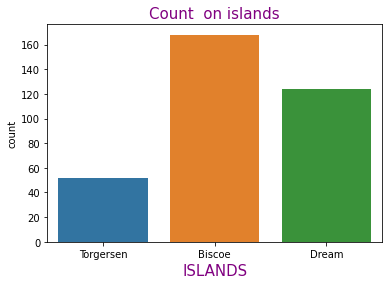

In [167]:
sns.countplot(penguins['island'])
plt.xlabel('ISLANDS',color='Purple',fontsize=15)
plt.title('Count  on islands',color='Purple',fontsize=15)
plt.show()

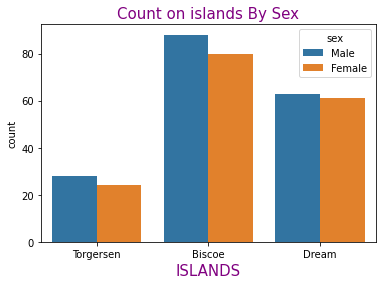

In [168]:
sns.countplot(penguins['island'],hue=penguins['sex'])
plt.xlabel('ISLANDS',color='Purple',fontsize=15)
plt.title('Count on islands By Sex',color='Purple',fontsize=15)
plt.show()

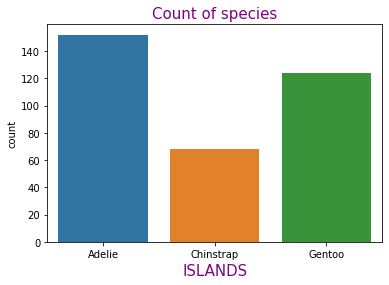

In [170]:
sns.countplot(penguins['species'])
plt.xlabel('ISLANDS',color='Purple',fontsize=15)
plt.title('Count of species',color='Purple',fontsize=15)
plt.show()

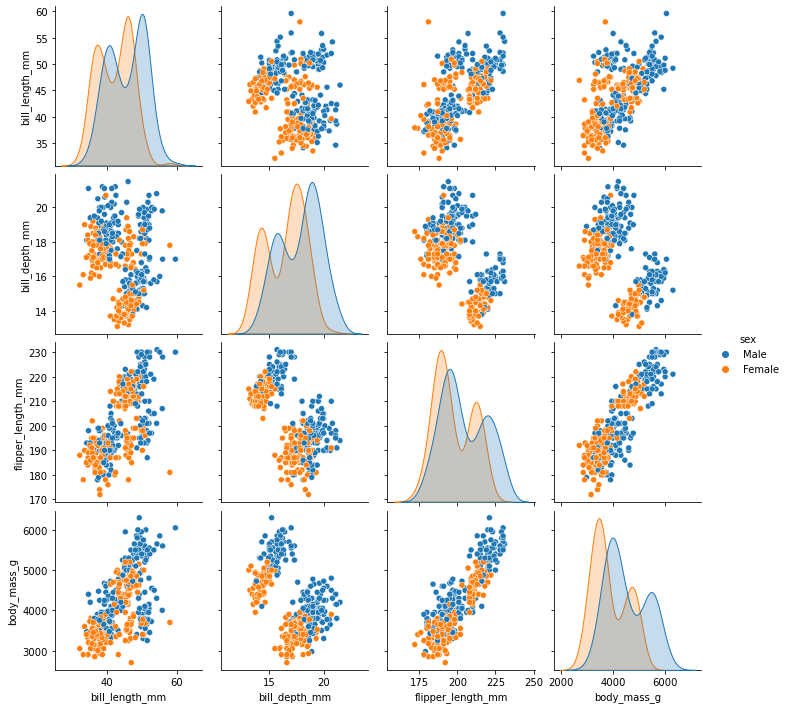

In [152]:

sns.pairplot(data=penguins,kind='scatter',hue='sex')
plt.show()

# 6.Obeservations

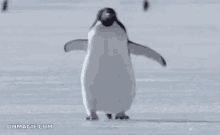

1.Highest Bill length is of Chinstrap from Dream island


2.Bill Depth of Gentoo is only least


3.Gentoo has highest flipper length and lowest is of Adelie from Biscoe.


4.Highest Bodymass is off Gentoo and lowest is of Adelie from Torgerse

5.Bill depth has a high negative relation with all other characterstic . body_mass and flipper_length is highly correlated.Means bigger the flipper length bigger the body mass. Scatter plot and heatmap confirms it.

6.Population of Biscoe>Dream> Torgersen.

7.Population of Adelie>Gentoo>Chinstrap

8.Male Penguins are heavier and than females in terms of every perimeter.Second scatterplot confirms it

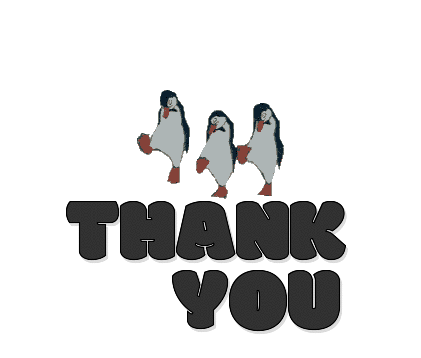